In [1]:
!pip install pytesseract opencv-python pillow

In [2]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

In [3]:
# Load the vehicle image
image_path = "car.jpg"  # Replace with your vehicle image
image = cv2.imread(image_path)

In [4]:
# Convert to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [5]:
# Use OpenCV's built-in method to enhance edges and contours
# Helps isolate the license plate region
blurred = cv2.bilateralFilter(gray, 11, 17, 17)  # Reduces noise while preserving edges
edged = cv2.Canny(blurred, 30, 200)              # Perform edge detection


In [6]:
# Find contours in the edged image
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [7]:
# Sort contours by area and keep top 10
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

license_plate = None


In [8]:
# Loop through contours to find a rectangle that might be a license plate
for c in contours:
    approx = cv2.approxPolyDP(c, 0.018 * cv2.arcLength(c, True), True)
    if len(approx) == 4:  # Look for a rectangular contour
        license_plate = approx
        break


In [9]:
# Mask everything except the license plate
mask = cv2.drawContours(cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY), [license_plate], -1, 255, -1)
x, y, w, h = cv2.boundingRect(license_plate)
plate_img = gray[y:y+h, x:x+w]


In [10]:
# Use pytesseract to read text from the cropped plate region
plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')  # Assume a single word line


In [11]:
# Draw rectangle and label on original image
image_display = image.copy()
cv2.drawContours(image_display, [license_plate], -1, (0, 255, 0), 3)
cv2.putText(image_display, f'Plate: {plate_text.strip()}', (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)


array([[[107, 127, 145],
        [106, 126, 144],
        [105, 125, 143],
        ...,
        [182, 166, 149],
        [182, 166, 149],
        [182, 166, 149]],

       [[108, 128, 146],
        [107, 127, 145],
        [107, 127, 145],
        ...,
        [182, 166, 149],
        [182, 166, 149],
        [182, 166, 149]],

       [[109, 129, 147],
        [109, 129, 147],
        [108, 128, 146],
        ...,
        [182, 166, 149],
        [182, 166, 149],
        [182, 166, 149]],

       ...,

       [[124, 136, 142],
        [154, 166, 172],
        [177, 189, 195],
        ...,
        [ 93,  95,  96],
        [112, 114, 115],
        [128, 130, 131]],

       [[115, 129, 135],
        [147, 161, 167],
        [165, 176, 184],
        ...,
        [ 88,  90,  91],
        [106, 108, 109],
        [121, 123, 124]],

       [[109, 123, 129],
        [125, 139, 145],
        [131, 142, 150],
        ...,
        [ 79,  81,  82],
        [ 82,  84,  85],
        [ 86,  88,  89]]

In [12]:
# Convert BGR to RGB for matplotlib display
image_rgb = cv2.cvtColor(image_display, cv2.COLOR_BGR2RGB)


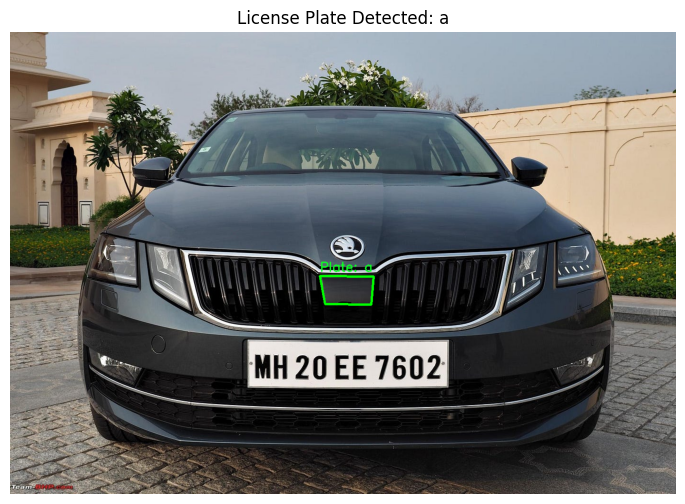

In [13]:
# Show results
plt.figure(figsize=(12, 6))
plt.imshow(image_rgb)
plt.title(f"License Plate Detected: {plate_text.strip()}")
plt.axis('off')
plt.show()

In [14]:
# Print final plate text
print("\n🚗 Detected License Plate Number:")
print(plate_text.strip())


🚗 Detected License Plate Number:
a
